## LSTM for Gait Phase Estimation

The purpose of this notebook is to train LSTM models to estimate a user's gait phase on both legs, independent of the locomotion mode.

In [1]:
from lstm_modules import *
from convolutional_nn import *
import numpy as np
import tensorflow as tf

In [2]:
# Separate test data from training/validation data
# np.random.seed(72)
# tf.random.set_seed(72)
test_trial = np.random.randint(1, 11)

### Tune Hyperparameters

Train X shape: (35335, 20, 10)
Train y shape: (35335, 4)
Test X shape: (3298, 20, 10)
Test y shape: (3298, 4)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 20, 10)            21        
_________________________________________________________________
lstm (LSTM)                  (None, 30)                4920      
_________________________________________________________________
dense (Dense)                (None, 4)                 124       
Total params: 5,065
Trainable params: 5,044
Non-trainable params: 21
_________________________________________________________________
Train on 28268 samples, validate on 7067 samples
Epoch 1/10
28268/28268 [==============================] - 6s 221us/sample - loss: 0.0605 - val_loss: 0.0297
Epoch 2/10
28268/28268 [==============================] - 4s 138us/sample - loss: 0.0115 - val_loss: 0.0286
Epoch 3/

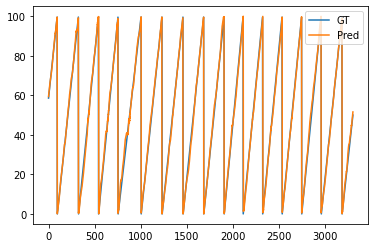

In [3]:
window_size = 20

dataset = cnn_train_test_split(test_trial, window_size)

print('Train X shape: {}'.format(dataset['X_train'].shape))
print('Train y shape: {}'.format(dataset['y_train'].shape))
print('Test X shape: {}'.format(dataset['X_test'].shape))
print('Test y shape: {}'.format(dataset['y_test'].shape))

model = lstm_model(sequence_length = 20, n_features = 10, X_train=dataset['X_train'])
model.summary()

early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0)
model_hist = model.fit(dataset['X_train'], dataset['y_train'], epochs=10, batch_size=128, verbose=1, validation_split=0.2, shuffle=True, callbacks= [early_stopping_callback])
model.save('test_rnn_model')

predictions = model.predict(dataset['X_test'])
left_rmse, right_rmse, gp = custom_rmse(dataset['y_test'], predictions)

print(left_rmse)
print(right_rmse)
plt.figure(1)
plt.plot(gp['left_true'])
plt.plot(gp['left_pred'])
plt.legend(['GT', 'Pred'])
plt.show()

# Define list of hyperparameter options
# For each hyperparameter combination
#   Create model using hyperparameters
#   Train model
#   Store hyperparameters and validation loss
#   Store plot of training/validation loss over time

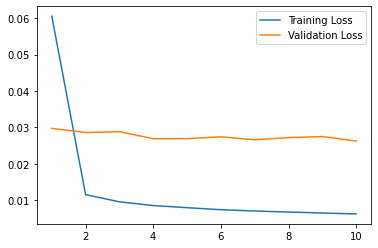

In [4]:
n_epochs = len(model_hist.history['loss'])
epochs = np.arange(1,n_epochs+1)
plt.figure(1)
plt.plot(epochs, model_hist.history['loss'])
plt.plot(epochs, model_hist.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Evaluate Model

In [5]:
# Evaluation metric is RMSE from cosine distance
#   Evaluate on 1 trial
#   Train optimal model on all other trials
#   Test optimal model on this trial
#   Print evaluation metric
#   Plot time series error